In [1]:

>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/16-17-fall-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/16-17-fall-ta.xlsx") # TA preference list

In [3]:
n_rows, n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of course dataframe is
number of rows: 103, number of columns: 9


In [4]:

n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 315, number of columns: 11


In [5]:
print("315 TA's assigned to FENS courses during fall semester of 2014/2015")

315 TA's assigned to FENS courses during fall semester of 2014/2015


# Brief preview of both TA and Course preference lists¶


In [6]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,10367.0,BIO 306,0,Microbiology,NaN,15.0,15.0,1-Yunus Akkoc ( 65757 ) (10 / 10)\n2-Raheela R...,"Yunus Akkoc (65757, BIO, 10 hours)\nBiran Musu..."
2,10369.0,BIO 308,0,Plant Physiology,NaN,15.0,15.0,1-Cevza Esin Tunc ( 65674 ) (10 / 10)\n1-Rahee...,"Cevza Esin Tunc (65674, BIO, 10 hours)\nRaheel..."
3,10373.0,BIO 321,0,Biochemistry I,NaN,25.0,20.0,2-Yunus Akkoc ( 65757 ) (10 / 10)\n3-Melike Ge...,"Sevde Nur Karatas (65640, BIO, 20 hours)\nBahr..."
4,10375.0,BIO 332,0,Cell Biology,NaN,30.0,20.0,2-Nazife Tolay ( 65329 ) (10 / 10)\n2-Melike G...,"Ronay Cetin (65771, BIO, 10 hours)\nLolai Ikro..."


In [7]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim \nRamadan,PHD,MATH,20,20,1- MATH 201 (190 / 125)\n2- MATH 301 (20 / 15)...,MATH 201,10945.0,NaN,NaN
1,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- ENS 209 (120 / 100)\n2- ME 307 (30 / 38)\n3...,ME 307,10554.0,\nME 409,11247.0
2,14277,Abdurrahman \nBurak,MS,EE,10,10,1- EE 303 (20 / 20)\n2- EE 480 (0 / 5)\n3- ENS...,EE 303,10419.0,NaN,NaN
3,20205,Adnan \nTaşdemir,PHD,MAT,10,10,NaN,NS 102,10751.0,NaN,NaN
4,21965,Ahmad Reza\nMotezakker,MS,ME,10,10,1- ENS 204 (50 / 75)\n2- MATH 101 (325 / 188)\...,ENS 204,10888.0,NaN,NaN


# Data types for TA & Courses dataframes¶


In [8]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

In [9]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

# Dealing with Dirty Data

In [10]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [11]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim Ramadan,PHD,MATH,20,20,1- MATH 201 (190 / 125)\n2- MATH 301 (20 / 15)...,MATH 201,10945,0,0
1,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- ENS 209 (120 / 100)\n2- ME 307 (30 / 38)\n3...,ME 307,10554,ME 409,11247
2,14277,Abdurrahman Burak,MS,EE,10,10,1- EE 303 (20 / 20)\n2- EE 480 (0 / 5)\n3- ENS...,EE 303,10419,0,0
3,20205,Adnan Taşdemir,PHD,MAT,10,10,0,NS 102,10751,0,0
4,21965,Ahmad Reza Motezakker,MS,ME,10,10,1- ENS 204 (50 / 75)\n2- MATH 101 (325 / 188)\...,ENS 204,10888,0,0


In [12]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,10367,BIO 306,0,Microbiology,0,15,15,1-Yunus Akkoc ( 65757 ) (10 / 10)\n2-Raheela R...,"Yunus Akkoc (65757, BIO, 10 hours)\nBiran Musu..."
2,10369,BIO 308,0,Plant Physiology,0,15,15,1-Cevza Esin Tunc ( 65674 ) (10 / 10)\n1-Rahee...,"Cevza Esin Tunc (65674, BIO, 10 hours)\nRaheel..."
3,10373,BIO 321,0,Biochemistry I,0,25,20,2-Yunus Akkoc ( 65757 ) (10 / 10)\n3-Melike Ge...,"Sevde Nur Karatas (65640, BIO, 20 hours)\nBahr..."
4,10375,BIO 332,0,Cell Biology,0,30,20,2-Nazife Tolay ( 65329 ) (10 / 10)\n2-Melike G...,"Ronay Cetin (65771, BIO, 10 hours)\nLolai Ikro..."
5,10371,BIO 407,0,Multicellular Organization,0,5,5,3-Burcin Ustbas ( 65608 ) (10 / 10)\n4-Nazife ...,"Halise Busra Cagirici (65299, BIO, 5 hours)"


## How many TA's requested for each course ?

In [13]:
for courses in range(1,n_rows) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 306 requested 3 TA's
BIO 308 requested 5 TA's
BIO 321 requested 4 TA's
BIO 332 requested 6 TA's
BIO 407 requested 2 TA's
BIO 445 requested 5 TA's
BIO 447 requested 1 TA's
BIO 452 requested 5 TA's
CHEM 301 requested 4 TA's
CHEM 405 requested 11 TA's
CS 201 requested 23 TA's
CS 204 requested 14 TA's
CS 300 requested 14 TA's
CS 302 requested 4 TA's
CS 303 requested 6 TA's
CS 307 requested 8 TA's
CS 400 requested 2 TA's
CS 402 requested 2 TA's
CS 405 requested 3 TA's
CS 408 requested 6 TA's
EE 303 requested 4 TA's
EE 307 requested 2 TA's
EE 311 requested 5 TA's
EE 313 requested 4 TA's
EE 401 requested 2 TA's
EE 403 requested 2 TA's
EE 407 requested 2 TA's
EE 409 requested 2 TA's
EE 413 requested 2 TA's
EE 414 requested 2 TA's
EE 417 requested 1 TA's
EE 473 requested 4 TA's
EE 480 requested 3 TA's
ELAE 1 requested 3 TA's
ENS 202 requested 3 TA's
ENS 203 requested 8 TA's
ENS 204 requested 9 TA's
ENS 205 requested 30 TA's
ENS 208 requested 20 TA's
ENS 209 requested 22 TA's
ENS 211 request

KeyError: 103

In [14]:
for TA in range(1,110) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 306 assigned 2 TA's
BIO 308 assigned 2 TA's
BIO 321 assigned 2 TA's
BIO 332 assigned 3 TA's
BIO 407 assigned 1 TA's
BIO 445 assigned 1 TA's
BIO 447 assigned 0 TA's
BIO 452 assigned 1 TA's
CHEM 301 assigned 2 TA's
CHEM 405 assigned 1 TA's
CS 201 assigned 15 TA's
CS 204 assigned 4 TA's
CS 300 assigned 2 TA's
CS 302 assigned 1 TA's
CS 303 assigned 4 TA's
CS 307 assigned 1 TA's
CS 400 assigned 1 TA's
CS 402 assigned 1 TA's
CS 405 assigned 1 TA's
CS 408 assigned 3 TA's
EE 303 assigned 2 TA's
EE 307 assigned 1 TA's
EE 311 assigned 1 TA's
EE 313 assigned 1 TA's
EE 401 assigned 1 TA's
EE 403 assigned 1 TA's
EE 407 assigned 1 TA's
EE 409 assigned 1 TA's
EE 413 assigned 1 TA's
EE 414 assigned 1 TA's
EE 417 assigned 1 TA's
EE 473 assigned 0 TA's
EE 480 assigned 0 TA's
ELAE 1 assigned 0 TA's
ENS 202 assigned 1 TA's
ENS 203 assigned 4 TA's
ENS 204 assigned 4 TA's
ENS 205 assigned 14 TA's
ENS 208 assigned 6 TA's
ENS 209 assigned 7 TA's
ENS 211 assigned 5 TA's
ENS 491 assigned 6 TA's
GR 555 E ass

KeyError: 103

## Number of Ta's for each program

In [15]:

top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT     70
IE      45
ME      43
BIO     39
CS      36
EE      36
MATH    18
MFE     15
PHYS    13
Name: Program, dtype: int64


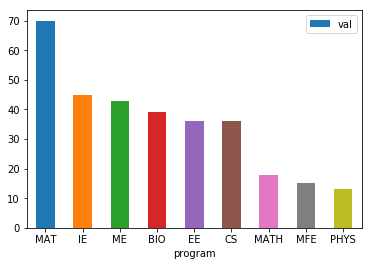

In [16]:
df = pd.DataFrame({'program':['MAT', 'IE', 'ME','BIO','EE','CS','MATH','MFE','PHYS'], 'val':[70, 45, 43,39,36,36,18,15,13]})
ax = df.plot.bar(x='program', y='val', rot=0)